In [62]:
import pandas as pd

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [64]:
file_path = 'FE_Course_Data/concrete.csv'  # Relative path to the file in the parent directory

In [65]:
df = pd.read_csv(file_path)
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [66]:
X = df.copy()
y = X.pop('CompressiveStrength')

In [67]:
baseline = RandomForestRegressor(criterion='absolute_error', random_state=0)

In [68]:
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)

In [69]:
baseline_score = -1 * baseline_score.mean()

In [70]:
print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.232


### Add three new ratio features to the dataset:

In [71]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

In [72]:
model = RandomForestRegressor(criterion='absolute_error', random_state=0)

In [73]:
baseline_score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)

In [74]:
score = -1 * baseline_score.mean()

In [75]:
print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 7.948


# Mutual Information

### feature utility metric

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
plt.style.use("seaborn-whitegrid")

In [78]:
file_path = 'FE_Course_Data/autos.csv'

In [79]:
df = pd.read_csv(file_path)

In [80]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [81]:
X = df.copy()
y = X.pop('price')

In [82]:
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

In [83]:
discrete_features = X.dtypes == int

In [84]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [85]:
from sklearn.feature_selection import mutual_info_regression

In [86]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series( mi_scores, name='MI SCORES', index = X.columns )
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

In [87]:
mi_scores = make_mi_scores(X, y, discrete_features)

In [88]:
mi_scores

curb_weight          1.555590
horsepower           1.272822
engine_size          0.999766
highway_mpg          0.957547
city_mpg             0.860095
width                0.673959
length               0.617830
wheel_base           0.585202
make                 0.546048
fuel_system          0.480214
bore                 0.468704
peak_rpm             0.450484
stroke               0.383975
height               0.356875
num_of_cylinders     0.333249
drive_wheels         0.333158
symboling            0.227025
engine_type          0.150219
compression_ratio    0.135795
aspiration           0.087994
body_style           0.080624
fuel_type            0.047298
engine_location      0.036912
num_of_doors         0.012234
Name: MI SCORES, dtype: float64

In [114]:
def bar_plot( scores ):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

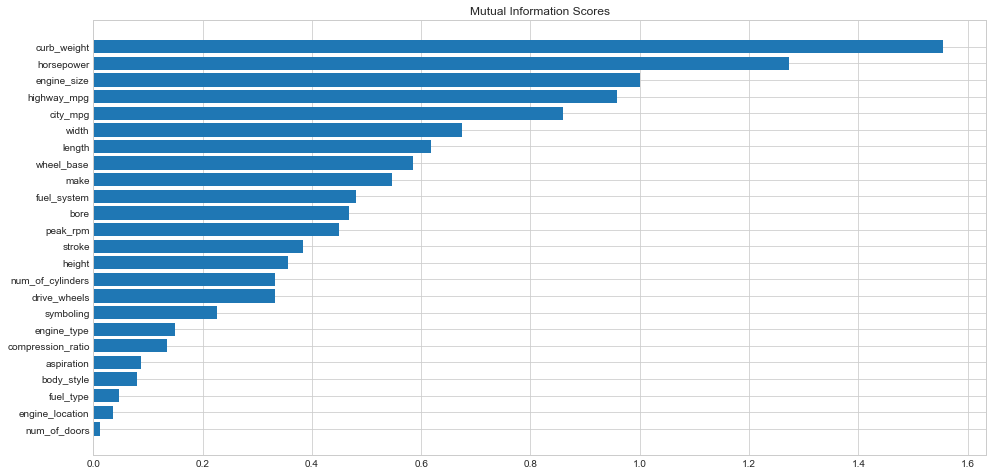

In [90]:
bar_plot(mi_scores)

In [91]:
import seaborn as sns

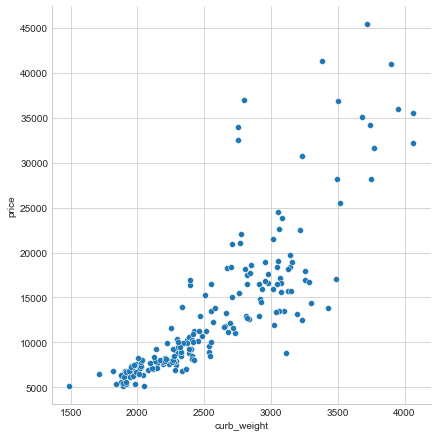

In [100]:
sns.relplot(x='curb_weight', y='price', height =6, data=df)

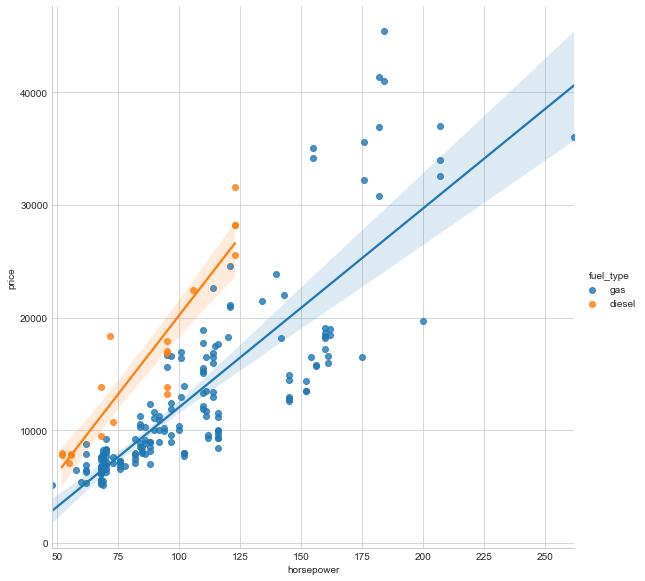

In [101]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", fit_reg = True, height=8, data=df)

### excersie

In [102]:
file_path = 'FE_Course_Data/ames.csv'  # Relative path to the file in the parent directory

In [103]:
df = pd.read_csv(file_path)

In [104]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


In [105]:
X = df.copy()
y = X.pop('SalePrice')

In [106]:
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

In [107]:
discrete_features = X.dtypes == int

In [108]:
discrete_features

MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MiscVal          False
MoSold            True
YearSold          True
SaleType          True
SaleCondition     True
Length: 78, dtype: bool

In [111]:
mi_scores = make_mi_scores(X,y, discrete_features=discrete_features)

In [112]:
mi_scores

OverallQual         0.591644
Neighborhood        0.573798
GrLivArea           0.495873
YearBuilt           0.436822
GarageArea          0.413582
                      ...   
Threeseasonporch    0.000570
Utilities           0.000399
PoolQC              0.000240
LandSlope           0.000007
MoSold              0.000000
Name: MI SCORES, Length: 78, dtype: float64

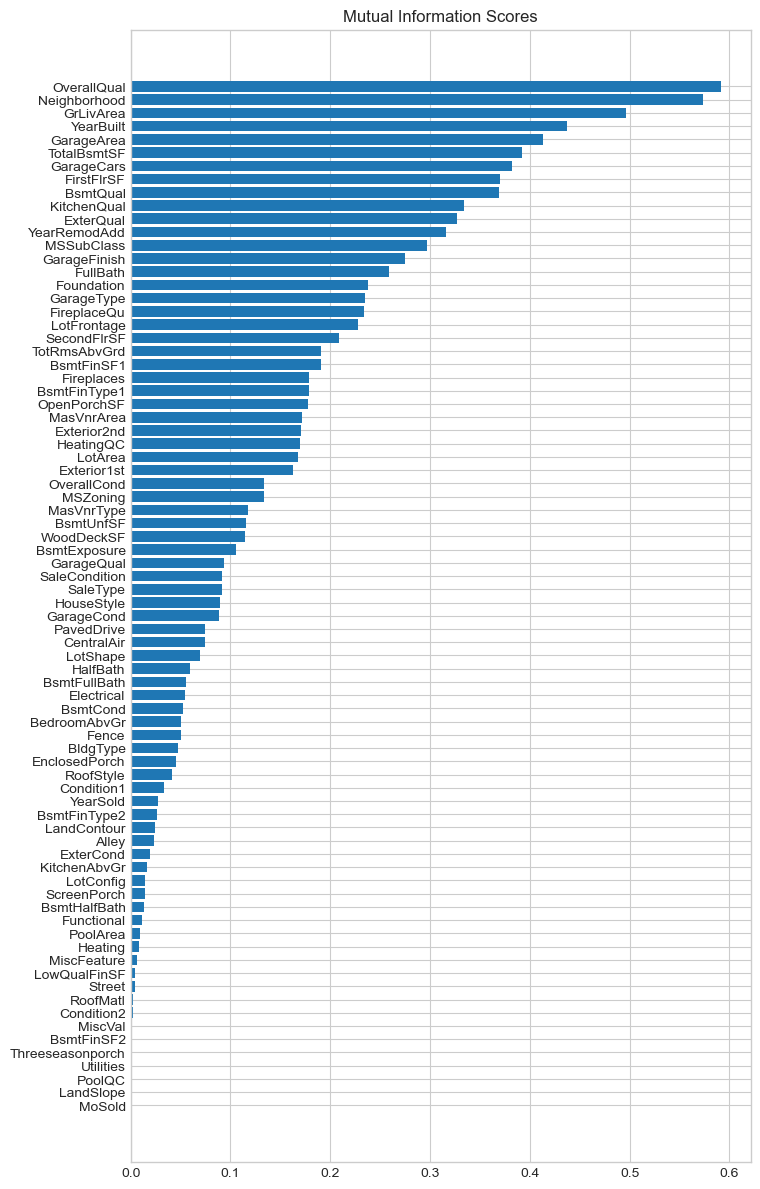

In [119]:
plt.figure(dpi=100, figsize=(8, 15))
bar_plot(mi_scores)

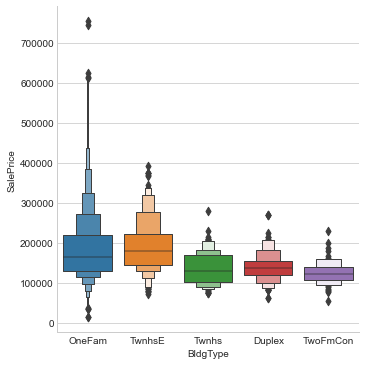

In [120]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

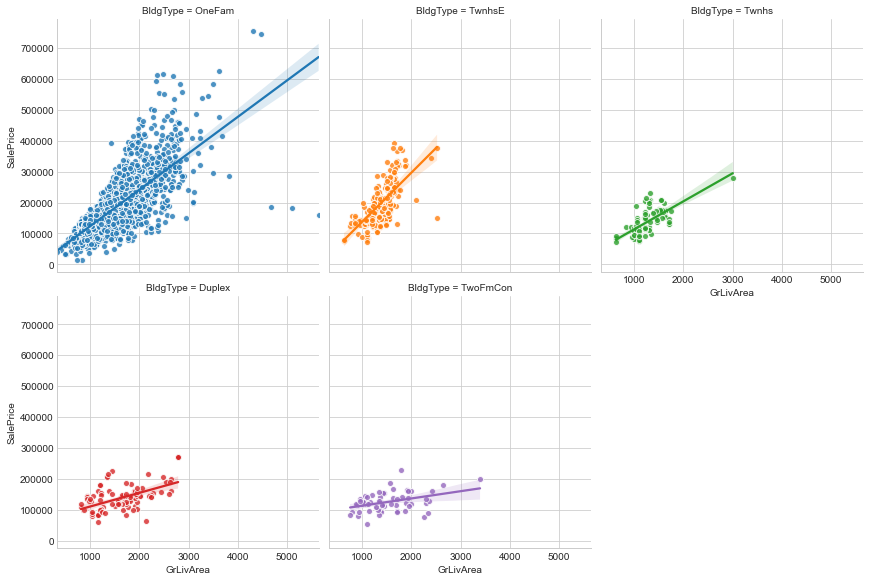

In [121]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

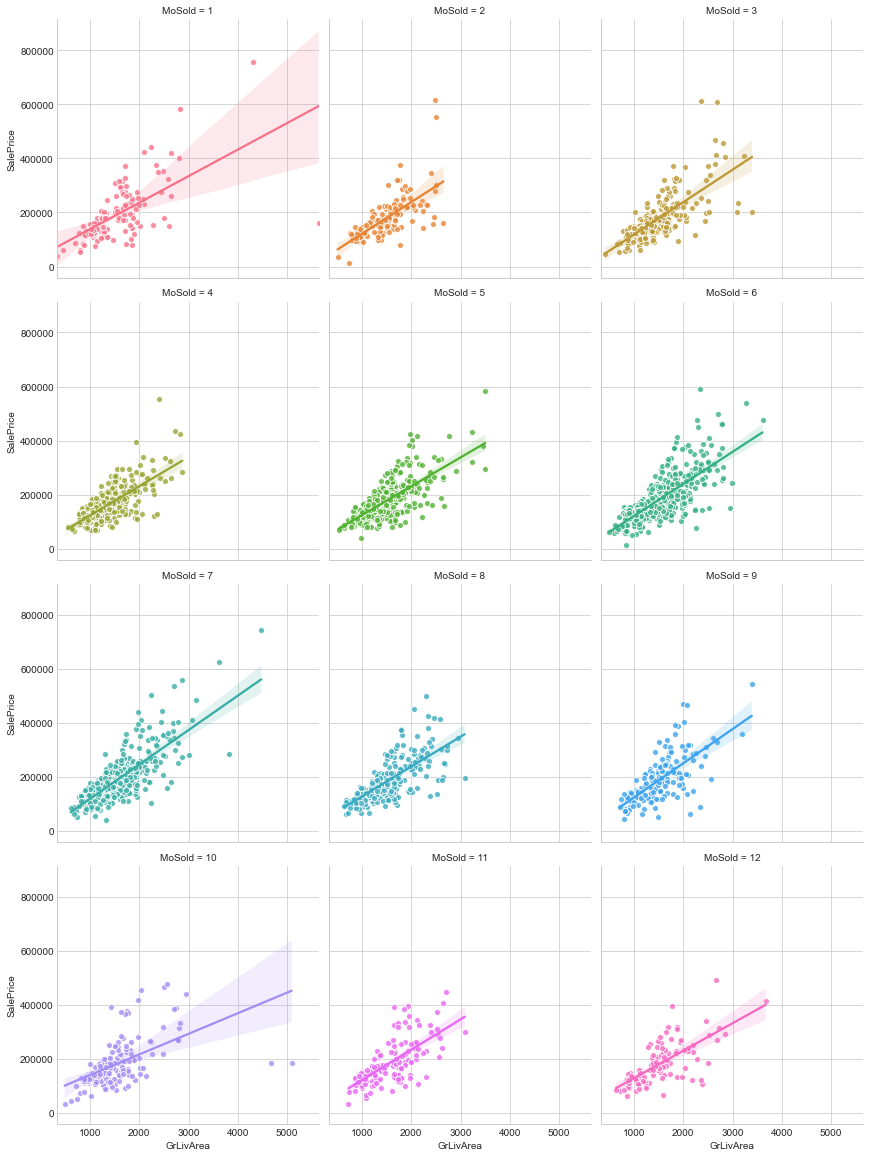

In [125]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="MoSold", col="MoSold",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

In [123]:
mi_scores.head(10)

OverallQual     0.591644
Neighborhood    0.573798
GrLivArea       0.495873
YearBuilt       0.436822
GarageArea      0.413582
TotalBsmtSF     0.392127
GarageCars      0.382101
FirstFlrSF      0.370287
BsmtQual        0.369491
KitchenQual     0.333610
Name: MI SCORES, dtype: float64

# Create Feature

In [127]:
accidents = pd.read_csv("FE_Course_Data/accidents.csv")
autos     = pd.read_csv("FE_Course_Data/autos.csv")
concrete  = pd.read_csv("FE_Course_Data/concrete.csv")
customer  = pd.read_csv("FE_Course_Data/customer.csv")

In [128]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [129]:
autos["stroke_ratio"] = autos.stroke / autos.bore

In [130]:
autos[["stroke", "bore", "stroke_ratio"]].head()


,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [131]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)

In [132]:
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

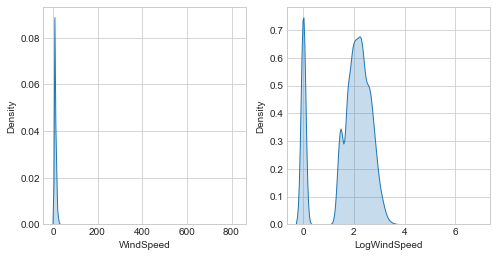

In [133]:
# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [134]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

In [135]:
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

In [136]:
accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [137]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,LogWindSpeed,RoadwayFeatures
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,2.833213,0
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,2.322388,0
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,2.208274,0
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,1.916923,0
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,2.079442,0


In [138]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

In [139]:
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

In [140]:
concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [141]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [142]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [143]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [144]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [145]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

In [146]:
# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

In [147]:
df_train.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level,AverageIncome,StateFreq,AverageClaim
3883,3883,SP56326,Arizona,7452.998789,No,Premium,High School or Below,1/1/11,Medical Leave,F,...,Offer1,Branch,670.581817,Four-Door Car,Medsize,Personal,L3,37405.402231,0.186446,675.497712
2733,2733,XZ23352,California,3839.746159,No,Basic,High School or Below,2/13/11,Unemployed,F,...,Offer4,Call Center,763.200000,SUV,Small,Corporate,L3,37558.946667,0.344865,375.952130
2212,2212,HT48275,Oregon,5532.753182,No,Basic,Bachelor,1/19/11,Employed,M,...,Offer2,Call Center,270.311239,Two-Door Car,Medsize,Personal,L3,37557.283353,0.284760,375.952130
7491,7491,WR85740,Arizona,8149.769437,No,Basic,Doctor,1/26/11,Unemployed,F,...,Offer2,Call Center,340.800000,Two-Door Car,Medsize,Corporate,L3,37405.402231,0.186446,375.952130
3708,3708,TL18087,Washington,3059.282091,No,Extended,Bachelor,2/27/11,Employed,M,...,Offer2,Web,369.600000,Four-Door Car,Medsize,Personal,L2,38122.733083,0.087366,489.320229


In [148]:
# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

In [149]:
df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Premium,675.497712
1,Basic,375.952130
2,Basic,375.952130
3,Premium,675.497712
4,Extended,489.320229
5,Basic,375.952130
6,Basic,375.952130
7,Basic,375.952130
8,Basic,375.952130
9,Premium,675.497712


# Excercise

In [2]:
import pandas as pd

In [3]:
file_path = 'FE_Course_Data/ames.csv'  # Relative path to the file in the parent directory
df = pd.read_csv(file_path)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


In [6]:
import seaborn as sns

In [7]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]

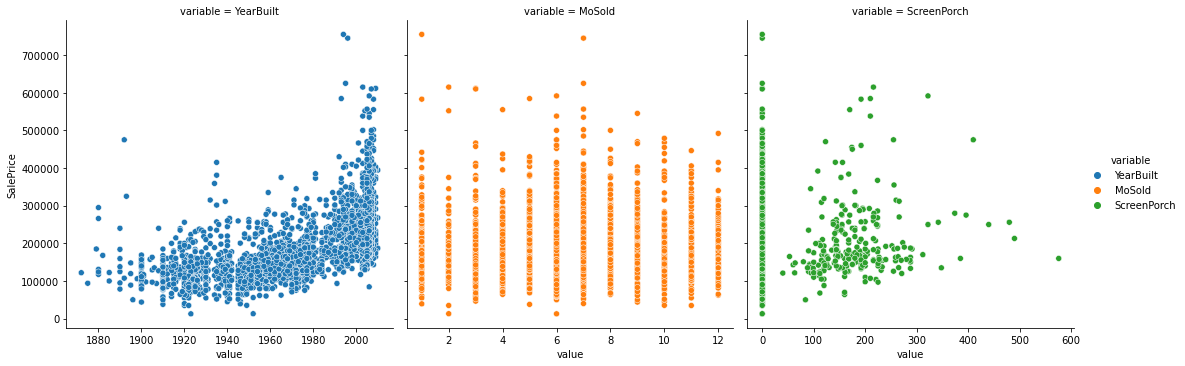

In [17]:
sns.relplot(
    x="value", y="SalePrice", col = "variable", hue="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
)

In [9]:
X = df.copy()
y = X.pop('SalePrice')

In [19]:
from sklearn.feature_selection import mutual_info_regression
    
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [20]:
scores = make_mi_scores(X,y)

In [27]:
import numpy as np
import matplotlib.pylab as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

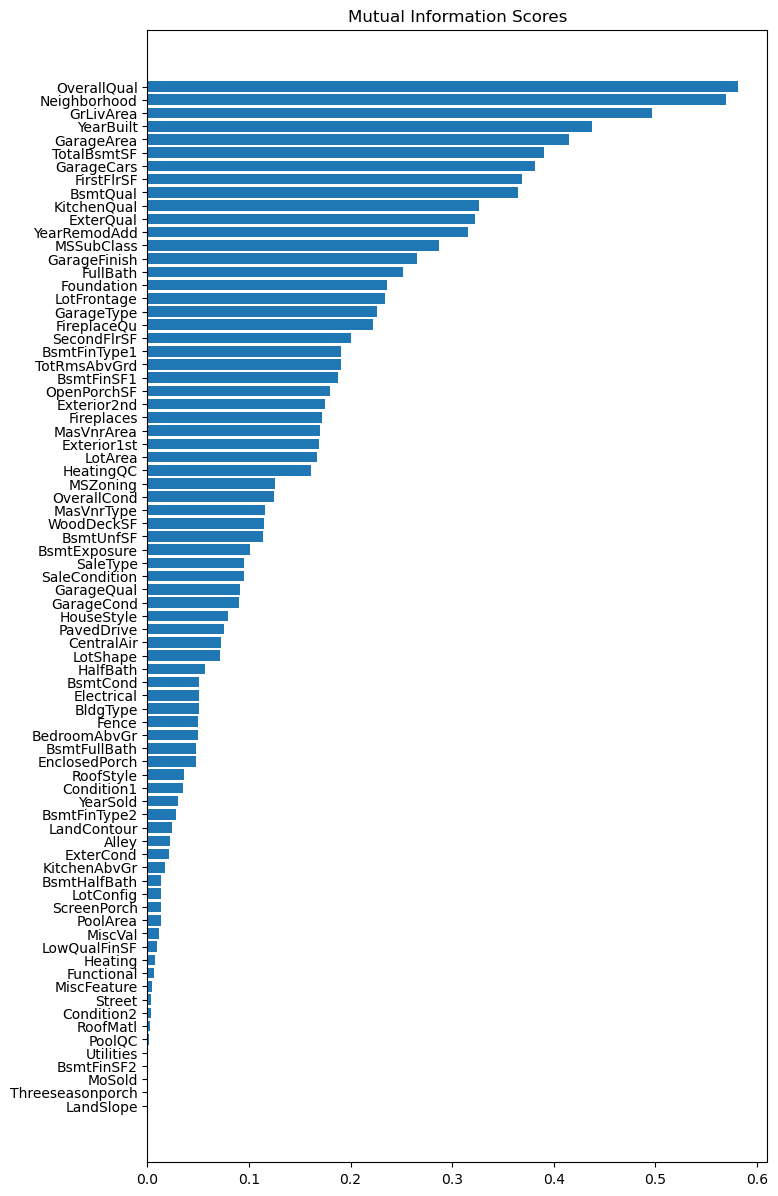

In [30]:
plt.figure(dpi=100, figsize=(8, 15))
plot_mi_scores(scores)

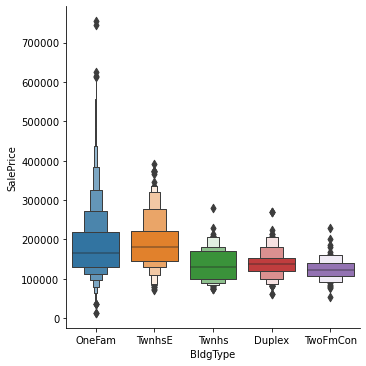

In [31]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

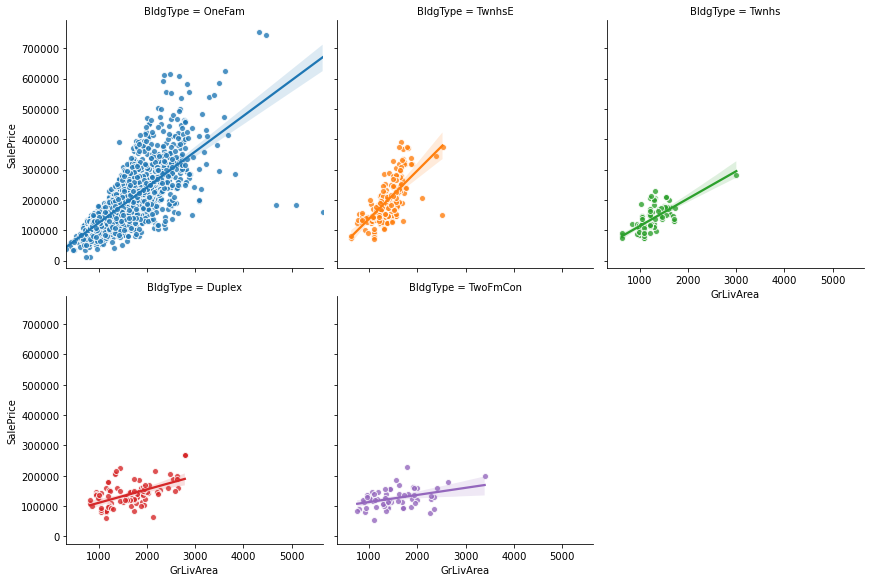

In [32]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

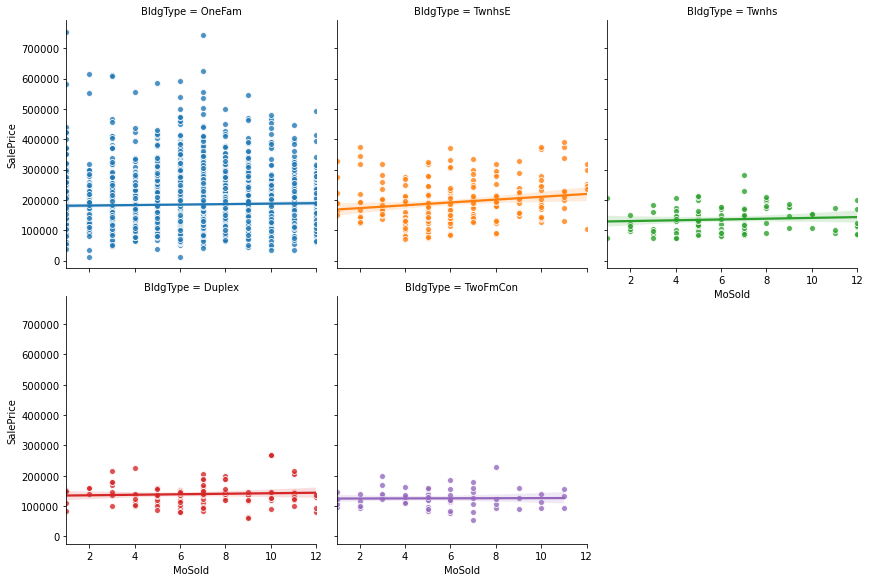

In [33]:
feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

# Exercise: Creating Features

In [34]:
file_path = 'FE_Course_Data/ames.csv'  # Relative path to the file in the parent directory
df = pd.read_csv(file_path)

In [35]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


In [36]:
X = df.copy()
y = X.pop('SalePrice') 

In [37]:
X_1 = pd.DataFrame()

X_1["LivLotRatio"] = df.GrLivArea / df.LotArea
X_1["Spaciousness"] = (df.FirstFlrSF + df.SecondFlrSF) / df.TotRmsAbvGrd
X_1["TotalOutsideSF"] = df.WoodDeckSF + df.OpenPorchSF + df.EnclosedPorch + df.Threeseasonporch + df.ScreenPorch

In [39]:
X_2 = pd.get_dummies(df.BldgType, prefix="Bldg")
X_2

,Bldg_Duplex,Bldg_OneFam,Bldg_Twnhs,Bldg_TwnhsE,Bldg_TwoFmCon
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2925,0,1,0,0,0
2926,0,1,0,0,0
2927,0,1,0,0,0
2928,0,1,0,0,0


In [40]:
X_2 = X_2.mul(df.GrLivArea, axis=0)
X_2

,Bldg_Duplex,Bldg_OneFam,Bldg_Twnhs,Bldg_TwnhsE,Bldg_TwoFmCon
0,0.0,1656.0,0.0,0.0,0.0
1,0.0,896.0,0.0,0.0,0.0
2,0.0,1329.0,0.0,0.0,0.0
3,0.0,2110.0,0.0,0.0,0.0
4,0.0,1629.0,0.0,0.0,0.0
...,...,...,...,...,...
2925,0.0,1003.0,0.0,0.0,0.0
2926,0.0,902.0,0.0,0.0,0.0
2927,0.0,970.0,0.0,0.0,0.0
2928,0.0,1389.0,0.0,0.0,0.0


In [41]:
X_3 = pd.DataFrame()

X_3["PorchTypes"] = df[[
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "Threeseasonporch",
    "ScreenPorch",
]].gt(0.0).sum(axis=1)

In [42]:
X_3

,PorchTypes
0,2
1,2
2,2
3,0
4,2
...,...
2925,1
2926,1
2927,2
2928,2


In [43]:
df.MSSubClass.unique()

array(['One_Story_1946_and_Newer_All_Styles', 'Two_Story_1946_and_Newer',
       'One_Story_PUD_1946_and_Newer',
       'One_and_Half_Story_Finished_All_Ages', 'Split_Foyer',
       'Two_Story_PUD_1946_and_Newer', 'Split_or_Multilevel',
       'One_Story_1945_and_Older', 'Duplex_All_Styles_and_Ages',
       'Two_Family_conversion_All_Styles_and_Ages',
       'One_and_Half_Story_Unfinished_All_Ages',
       'Two_Story_1945_and_Older', 'Two_and_Half_Story_All_Ages',
       'One_Story_with_Finished_Attic_All_Ages',
       'PUD_Multilevel_Split_Level_Foyer',
       'One_and_Half_Story_PUD_All_Ages'], dtype=object)

In [44]:
X_4 = pd.DataFrame()

X_4["MSClass"] = df.MSSubClass.str.split("_", n=1, expand=True)[0]

In [46]:
X_4

,MSClass
0,One
1,One
2,One
3,One
4,Two
...,...
2925,Split
2926,One
2927,Split
2928,One


In [45]:
X_5 = pd.DataFrame()

X_5["MedNhbdArea"] = df.groupby('Neighborhood')['GrLivArea'].transform('median')

In [47]:
X_5

,MedNhbdArea
0,1200.0
1,1200.0
2,1200.0
3,1200.0
4,1560.0
...,...
2925,1282.0
2926,1282.0
2927,1282.0
2928,1282.0


In [50]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [51]:
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [52]:
X_new = X.join([X_1, X_2, X_3, X_4, X_5])
score_dataset(X_new, y)

0.13847331622461567

# Clustering With K-Means

In [54]:
file_path = 'FE_Course_Data/housing.csv' 
df = pd.read_csv(file_path)

In [55]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
X = df.loc[:, ['MedInc','Latitude','Longitude']]

In [57]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [58]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters=6, n_init=10)

In [68]:
kmeans.fit(X)

KMeans(n_clusters=6, n_init=10)

In [69]:
X["Cluster"] = kmeans.predict(X)
X["Cluster"] = X["Cluster"].astype("category")

In [70]:
X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,3


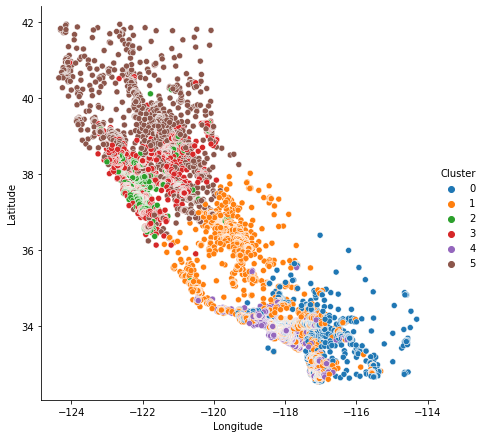

In [71]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
)

In [72]:
X["MedHouseVal"] = df["MedHouseVal"]

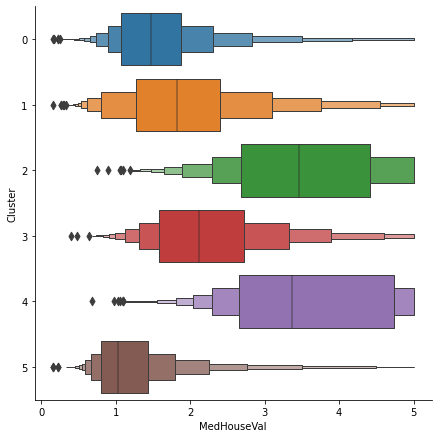

In [73]:
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6)

### Exercise: Clustering With K-Means

In [106]:
file_path = 'FE_Course_Data/ames.csv' 
df = pd.read_csv(file_path)

In [107]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000


In [108]:
X = df.copy()
y = X.pop("SalePrice")

features = ['LotArea','TotalBsmtSF','FirstFlrSF','SecondFlrSF','GrLivArea']

In [109]:
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

In [110]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [111]:
X["Cluster"] = kmeans.predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category")

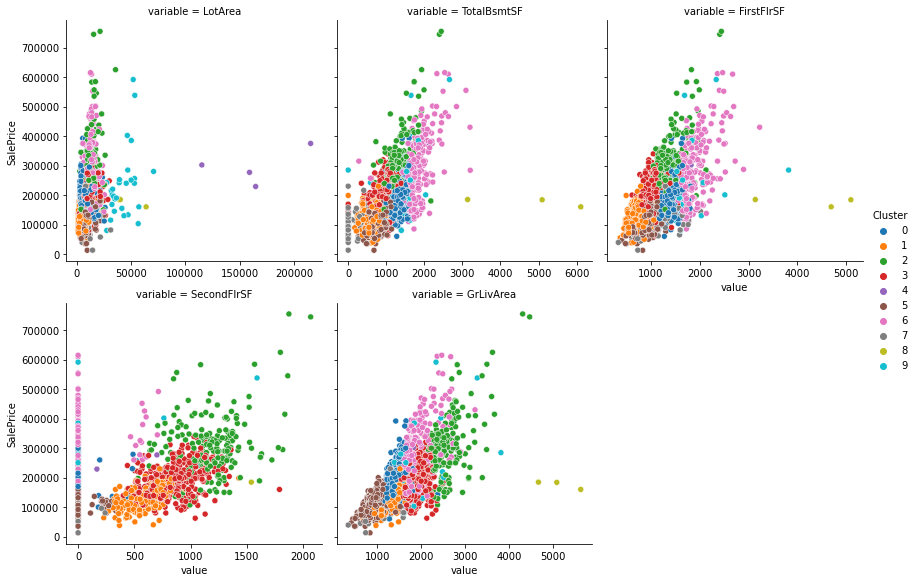

In [112]:
Xy = X.copy()

Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y

sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
)

In [113]:
data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    )

In [114]:
Xy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Cluster,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,9,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,5,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,0,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,6,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,3,189900


In [115]:
data.head(10)

,SalePrice,Cluster,variable,value
0,215000,9,LotArea,31770.0
1,105000,5,LotArea,11622.0
2,172000,0,LotArea,14267.0
3,244000,6,LotArea,11160.0
4,189900,3,LotArea,13830.0
5,195500,3,LotArea,9978.0
6,213500,0,LotArea,4920.0
7,191500,0,LotArea,5005.0
8,236500,0,LotArea,5389.0
9,189000,3,LotArea,7500.0


In [116]:
score_dataset(X, y)

0.14314322905088217

In [117]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

#Compute clustering and transform X to cluster-distance space.
X_cd = kmeans.fit_transform(X_scaled)
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])

X = X.join(X_cd)

In [118]:
score_dataset(X, y)

0.1408559614587017

In [119]:
X_cd

,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,2.977514,4.324979,4.172115,3.780258,16.792665,3.696276,3.032162,3.912313,13.097627,1.677604
1,1.969544,1.879362,4.654799,2.754284,19.594509,0.461371,3.852233,1.941728,15.785445,5.026636
2,0.644657,2.716520,3.743687,2.616186,19.030448,1.650239,2.135609,2.888012,14.058973,3.965749
3,2.868083,5.244512,3.885630,4.432911,19.392116,4.576079,0.995900,5.513141,11.373003,4.586658
4,2.333623,1.313746,2.689990,0.738670,19.225117,2.175157,3.569021,2.691082,14.749591,4.469214
...,...,...,...,...,...,...,...,...,...,...
2925,1.530951,1.868376,4.422977,2.623370,19.983709,0.237774,3.464557,2.095992,15.515254,5.185956
2926,1.961062,1.785543,4.675534,2.747987,19.937172,0.257994,3.887002,1.888941,15.897940,5.303318
2927,1.718819,1.842252,4.492302,2.637712,19.701445,0.234517,3.625175,1.909836,15.610602,5.004958
2928,0.146882,2.752311,3.678552,2.633792,19.548612,1.731053,1.922301,3.012923,14.012415,4.411214


In [120]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,2.977514,4.324979,4.172115,3.780258,16.792665,3.696276,3.032162,3.912313,13.097627,1.677604
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,1.969544,1.879362,4.654799,2.754284,19.594509,0.461371,3.852233,1.941728,15.785445,5.026636
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,0.644657,2.716520,3.743687,2.616186,19.030448,1.650239,2.135609,2.888012,14.058973,3.965749
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,2.868083,5.244512,3.885630,4.432911,19.392116,4.576079,0.995900,5.513141,11.373003,4.586658
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,2.333623,1.313746,2.689990,0.738670,19.225117,2.175157,3.569021,2.691082,14.749591,4.469214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0,37.0,7937.0,0,0,0,0,0,2,...,1.530951,1.868376,4.422977,2.623370,19.983709,0.237774,3.464557,2.095992,15.515254,5.185956
2926,0,0,0.0,8885.0,0,0,0,3,0,1,...,1.961062,1.785543,4.675534,2.747987,19.937172,0.257994,3.887002,1.888941,15.897940,5.303318
2927,4,0,62.0,10441.0,0,0,1,0,0,1,...,1.718819,1.842252,4.492302,2.637712,19.701445,0.234517,3.625175,1.909836,15.610602,5.004958
2928,0,0,77.0,10010.0,0,0,1,0,0,1,...,0.146882,2.752311,3.678552,2.633792,19.548612,1.731053,1.922301,3.012923,14.012415,4.411214


# PCA

In [122]:
file_path = 'FE_Course_Data/abalone.csv' 
df = pd.read_csv(file_path)

In [123]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


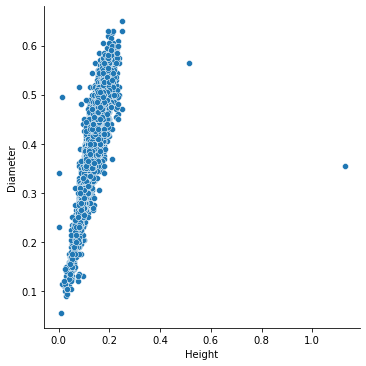

In [124]:
sns.relplot(data= df, x='Height', y='Diameter')

In [125]:
file_path = 'FE_Course_Data/autos.csv' 
df = pd.read_csv(file_path)

In [126]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [127]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [128]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [129]:
from sklearn.decomposition import PCA

In [130]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [131]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [132]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


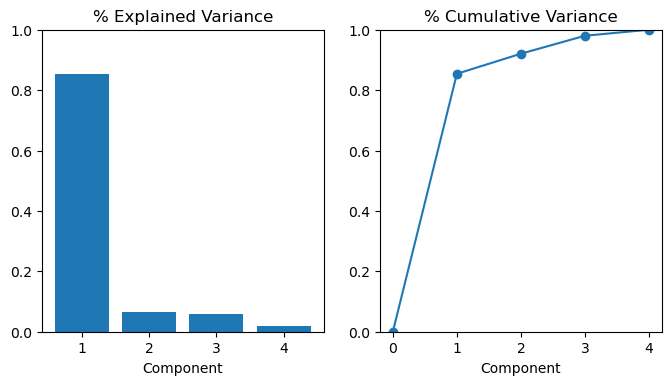

In [133]:
# Look at explained variance
plot_variance(pca);

In [134]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.012585
PC2    0.379690
PC3    0.306892
PC4    0.204268
Name: MI Scores, dtype: float64

In [135]:
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


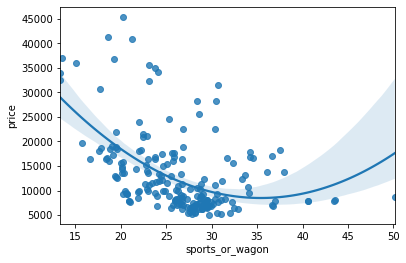

In [136]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

# Exercise: Principal Component Analysis

In [32]:
import pandas as pd

In [33]:
file_path = 'FE_Course_Data/ames.csv'  # Relative path to the file in the parent directory
df = pd.read_csv(file_path)

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


In [5]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

In [8]:
df[features].corrwith(df['SalePrice'])

GarageArea      0.640138
YearRemodAdd    0.532974
TotalBsmtSF     0.632529
GrLivArea       0.706780
dtype: float64

In [34]:
X = df.copy()

In [35]:
y = X.pop('SalePrice')

In [36]:
X = X.loc[:, features]

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
def apply_PCA(X, standardize=True):
    if standardize:
        scaler = StandardScaler()
        X = pd.DataFrame( scaler.fit_transform(X), columns= X.columns)
    
    pca = PCA()
    X_pca = pca.fit_transform(X)
    comp_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=comp_names)
    
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=comp_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )

    return pca, X_pca, loadings

In [44]:
pca, X_pca, loadings = apply_PCA(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.541229  0.102375 -0.038470  0.833733
YearRemodAdd  0.427077 -0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076  0.360778 -0.666836 -0.406192
GrLivArea     0.514294  0.270700  0.742592 -0.332837
